In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
1. cars(x:speed, y:dist) 데이터를 이용하여 회귀계수(기울기,절편) 를 구하시요.
공식(B0, B1)을 이용하여 구하시요.( 선형회귀분석.pdf 파일 6페이지공식)

2.  x=[1,2,3,4,5,6,7,8,9,10]  ,y=[2,4,6,8,10,12,14,16,18,20]
일때 hx = wx 로 하여
학습방법을 이용하여 w값을 구하시요.

3. 삼성전자주가중 2020년 종가 표본 100개를 추출하여
2020년 종가의 평균을 신뢰도 95% 로 추정하시요.


4. 2020년도 삼성전자 주가 표본크기가 20인 표본 100개를 추출하여
표본평균의 평균, 표본평균의 분산, 표본평균의 편차를 구하시요.

5. 어느 회사에서 생산하는 전자제품의 평균수명을 조사하기 위하여, 
표본 100개를 뽑았더니 평균은 800일이 나왔다. 
그리고 과거의 자료를 분석한 결과 모표준편차(σ)는 40일이라고 한다. 
이때 전자제품의 평균수명에 대한 95%의 신뢰구간을 구하시오.


6. 우리나라 대학생들의 월 평균용돈을 알아보기 위하여, 대학생 70명을 조사하였더니, 
월 평균용돈은 13만 원이 나왔다. 그럼 모표준편차(σ)를 3만 원이라고 가정했을 때,
 대학생의 월 평균용돈에 대한 99%의 신뢰구간을 구하시오.


7. y = (5x+3)^3 인경우 편미분을 이용하여 미분값 도출과정을 적으시요.


In [ ]:
'''
2.  x=[1,2,3,4,5,6,7,8,9,10]  ,y=[2,4,6,8,10,12,14,16,18,20]
일때 hx = wx 로 하여
학습방법을 이용하여 w값을 구하시요.
'''

In [32]:
x=[1,2,3,4,5,6,7,8,9,10]
y=[2,4,6,8,10,12,14,16,18,20]

y=2x w=2

In [33]:
# cost
def cost(x,y,w):
    c = 0 
    for i in np.arange(len(x)):
        hx = w*x[i]
        c  = c+(hx-y[i])**2 # (예측값 - 실제값) * 2
    return c/len(x) 

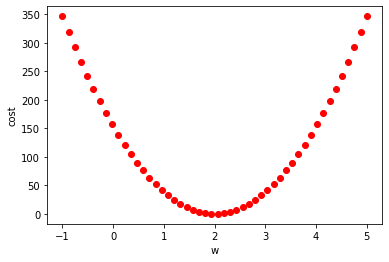

In [39]:
plt.xlabel('w')
plt.ylabel('cost')

# -3에서 5까지 50개
# 결과 1로 모이는것을 확인 => cost값이 가장 적은 지점, w 값은 1이 적절
for w in np.linspace(-1,5,50):
    c =  cost(x, y, w)
    # print(w,c)
    plt.plot(w,c,'ro')
plt.show()

In [54]:
# 특정 접점의 순간 기울기를 알아내는 함수
def gradient_descent( x,y,w ):
    c = 0
    for i in range(len(x)):
        hx = w*x[i] # y 예측값
        c = c + (hx-y[i]) * (1/2 * x[i]) #편미분
    return c/len(x)

In [63]:
def show_gradient(x,y,w):
    for i in range(30): # 학습횟수
        c = cost(x,y,w)
        g = gradient_descent(x,y,w) # w가 10일때 순간 기울기값?
        print(i,c,w,g)
        w = w - 0.1 * g  #0.1 (러닝메이트) * 기울기
    print("w:",w)

In [66]:
show_gradient(x, y, 10)

0 2464.0 10 154.0
1 2108.2599999999998 -5.4 -142.45
2 1803.8799624999992 8.844999999999999 131.76624999999996
3 1543.444792914061 -4.331624999999997 -121.88378124999994
4 1320.6099509370936 7.856753124999997 112.74249765624995
5 1129.9468892705509 -3.4174966406249982 -104.2868103320312
6 966.8108071321143 7.011184392578121 96.46529955712883
7 827.2274968524156 -2.635345563134763 -89.23040209034419
8 707.7965269943481 6.287694645899656 82.53812193356836
9 605.6084034095388 -1.9661175474571806 -76.34776278855072
10 518.1736901672866 5.668658731397892 70.62168057940941
11 443.3623636493844 -1.3935093265430494 -65.3250545359537
12 379.3519223975045 5.13899612705232 60.425675445757165
13 324.58298860136483 -0.9035714175233966 -55.89374978732538
14 277.72131962204287 4.685803561209142 51.70171855327599
15 237.62530410161042 -0.4843682941184566 -47.82408966178029
16 203.3181508219405 4.298040672059573 44.23728293714677
17 173.96409279702274 -0.1256876216551044 -40.91948671686076
18 148.848026

In [50]:
'''
5. 어느 회사에서 생산하는 전자제품의 평균수명을 조사하기 위하여, 
표본 100개를 뽑았더니 평균은 800일이 나왔다. 
그리고 과거의 자료를 분석한 결과 모표준편차(σ)는 40일이라고 한다. 
이때 전자제품의 평균수명에 대한 95%의 신뢰구간을 구하시오.
'''

'\n5. 어느 회사에서 생산하는 전자제품의 평균수명을 조사하기 위하여, \n표본 100개를 뽑았더니 평균은 800일이 나왔다. \n그리고 과거의 자료를 분석한 결과 모표준편차(σ)는 40일이라고 한다. \n이때 전자제품의 평균수명에 대한 95%의 신뢰구간을 구하시오.\n'

In [14]:
# 표본갯수 100개 (n = 100)
# 평균일 800일 (Mean = 800)
# 모표준편차 40일 (.std = 40)
# 95% 신뢰구간 (k=1.96)

ele1 = 800 - 1.96*(40/math.sqrt(100))
ele2 = 800 + 1.96*(40/math.sqrt(100))
print(ele1)
print(ele2)
print("신뢰구간 차이 : ", round(ele2-ele1,2))


792.16
807.84
신뢰구간 차이 :  15.68


In [3]:
'''
6. 우리나라 대학생들의 월 평균용돈을 알아보기 위하여, 대학생 70명을 조사하였더니, 
월 평균용돈은 13만 원이 나왔다. 그럼 모표준편차(σ)를 3만 원이라고 가정했을 때,
 대학생의 월 평균용돈에 대한 99%의 신뢰구간을 구하시오
'''

In [13]:
# 월 평균용돈 13만원 (Mean = 13)
# 대학생 70명 (n=70)
# 모표준편차 (.std = 3)
# 99% 신뢰구간 (k=2.58)
mon1 = 13 - 2.58*(3/math.sqrt(70))
mon2 = 13 + 2.58*(3/math.sqrt(70))
print(mon1)
print(mon2)
print("신뢰구간 차이 : ", round(mon2-mon1,2))

12.07489305637518
13.92510694362482
신뢰구간 차이 :  1.85


In [ ]:
'''
7. y = (5x+3)^3 인경우 편미분을 이용하여 미분값 도출과정을 적으시요.
'''

In [30]:
# a = x절편, b=상수, z=제곱수
# x = x값
def diff_1 (x,a,b,z):
    diff = (z* ( (a*x + b)**(z-1) ) ) * a
    return diff

In [ ]:
(5x+3)^3
=> 3(5x+3)^(3-1) * (5x+3)`
= 3(5x+3)^(3-1) * 5

In [37]:
# x=1을 대입
diff_1(1,5,3,3)

960